# Test de différentes instances

On teste différentes instances de test.

On compare les résultats obtenus avec différentes distributions de probabilités. Les comparaisons sont stockés dans des fichiers .txt dans le dossier test.

### 

In [97]:
# include all the necessary packages, if some of them are not installed, you will need to install them before
using Random, MetaGraphs, SimpleWeightedGraphs,JuMP, DelimitedFiles, Distributions, NBInclude, GLPK, GraphPlot, Graphs, Random, CPUTime, HiGHS

In [84]:
@nbinclude("main.ipynb")
@nbinclude("dataparser.ipynb")

[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]====================================
LISTE ET CARACTERISTIQUES DES CYCLES


Le cycle [1, 6] est de longueur 2
  Il est constitué des arcs [1, 6]
  Et ses sommets sont :
	 - 1, présent que l'on retrouve dans les cycles Any[1, 2]
	 - 6, présent que l'on retrouve dans les cycles Any[1, 2]


Le cycle [1, 6, 3, 8] est de longueur 4
  Il est constitué des arcs [6, 1]
  Et ses sommets sont :
	 - 1, présent que l'on retrouve dans les cycles Any[1, 2]
	 - 6, présent que l'on retrouve dans les cycles Any[1, 2]
	 - 3, présent que l'on retrouve dans les cycles Any[2, 3]
	 - 8, présent que l'on retrouve dans les cycles Any[2, 3]


Le cycle [3, 8] est de longueur 2
  Il est constitué des arcs [6, 3]
  Et ses s

read_kep_file

In [53]:
"""
description_instance

Make the description of an instance : number of cycles, number of high or low sensitized patitents

Inputs :
    - kep_graph : MetaDiGraph
    - L : maximum length of a cycle
    - A : list of arcs in a cycle
    - list_cycles : list of cycles 
    - string name : name of the instance

"""
function description_instance(kep_graph::MetaDiGraph, L, A, list_cycles=[], name = "")
    println("=================================")
    println("# Description de l'instance "*name)
    println("=================================")
    println(string("Nombre de sommet : ", nv(kep_graph), "\n"))
    println(string("Nombre de cycles de longueur inférieure à ",L," : ",length(list_cycles),"\n"))
    println(string("Nombre d'arcs appartenant à au moins un cycle : ", length(unique(A))))
    println(string("Nombre de sommets appartenant à au moins un cycle : ", length(keys(I))))
    prop_high_UNOS = 0
    prop_high_APD = 0

    for i in 1:nv(kep_graph)
        if get_prop(kep_graph, i, :pra) > 0.8
            prop_high_UNOS +=1
        end
        if get_prop(kep_graph, i, :pra) > 0.75
            prop_high_APD +=1
        end
    end
    if prop_high_UNOS >0
    
        prop_high_UNOS /= nv(kep_graph)
    end
    if prop_high_APD > 0
        prop_high_APD /= nv(kep_graph)
    end
    println("Proportion de patients UNOS très sensible dans l'instance : "*string( 100*prop_high_UNOS)*"% \n")
    println("Proportion de patients APD très sensible dans l'instance : : "*string(100*prop_high_APD)*"% \n")

    prop_high_UNOS_cycles = 0
    prop_high_APD_cycles = 0
    for a in unique(A)
        for i in a
            if get_prop(kep_graph, i, :pra) > 0.8
                prop_high_UNOS_cycles +=1
            end
            if get_prop(kep_graph, i, :pra) > 0.75
                prop_high_APD_cycles +=1
            end
        end
    end
    println("Nombre de patients UNOS très sensible dans l'instance : "*string(prop_high_UNOS_cycles))
    println("Nombre de patients UNOS très sensible dans l'instance : "*string(prop_high_APD_cycles))
end

description_instance

Les instances sont sockées dans un dictinnaire appelé `instance_test`.

In [5]:
path = "C:/Users/matth/Documents/5GM/optim sous incertitude/stochastic_optimization/data/"
files_names = ["MD-00001-00000001","MD-00001-00000036","MD-00001-00000072","00036-00000114", "00036-00000152", "00036-00000191", "00036-00000231", "00036-00000273"]
CPUtic()
instance_test = Dict("kep16"=>read_kep_file(path*files_names[1]*".wmd", path*files_names[1]*".dat") );
for i in 2:length(files_names)
    instance_test = merge(instance_test, Dict("kep"*string(2^(i+3)) => read_kep_file(path*files_names[i]*".wmd", path*files_names[i]*".dat")))
end
time_download = CPUtoc()

elapsed CPU time: 11.593 seconds


11.593

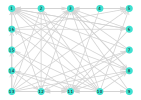

In [6]:
x = [0, 10, 20, 30, 40, 40, 40, 40, 40, 30, 20, 10, 0, 0, 0, 0]
y = [0, 0, 0, 0, 0, 10, 20, 30, 40, 40, 40, 40, 40, 30, 20, 10]
nodelabel = 1:MetaGraphs.nv(instance_test["kep16"])
gplot(instance_test["kep16"], nodelabel = nodelabel, x, y)

In [7]:
function get_pra_in_sol(kep_graph, sol)
    prop_high_UNOS_cycles = 0
    prop_high_APD_cycles = 0
    for a in sol
        for i in a
            if get_prop(kep_graph, i, :pra) > 0.8
                prop_high_UNOS_cycles +=1
            end
            if get_prop(kep_graph, i, :pra) > 0.75
                prop_high_APD_cycles +=1
            end
        end
    end
    return prop_high_UNOS_cycles, prop_high_APD_cycles
end

get_pra_in_sol (generic function with 1 method)

In [7]:
function compare(kep_graph, L, name="", nb_tests_allowed = 5, path = "C:/Users/matth/Documents/5GM/optim sous incertitude/stochastic_optimization/test/" )
    CPUtic()
    cycles, lc, Ac, A, I, Ca = pre_traitement(kep_graph,L)
    time_pretraitement = CPUtoc()
    description = description_instance(kep_graph, L, A, cycles, name)

    println("=====================================\n")
    println(string("Temps CPU pris pour le prétraitement : ",time_pretraitement), "\n \n")

    storage = Dict()
    distributions = ["Constant","Binomial","BinomialUNOS","BinomialAPD"]
    for distrib in distributions
        storage[distrib] = Dict()
        fail = get_failure_rates(kep_graph, distrib)
        println( "==================================\n" )
        println( string(" Results with distribution ", distrib, "\n"))
        println( "==================================\n \n" )
        println( "MIP par cycle sans prendre en compte la taille des cycles :\n ") 
        println( "==================================\n" )
        CPUtic()
        sol = determinist_weighted_cycle_MIP(kep_graph, cycles,true)       
        time_weighted_cycle_lgt = CPUtoc()
        storage[distrib]["cycle_MIP_lgt"] = sol
        println( string("Temps CPU  : ",time_weighted_cycle_lgt))
        println( string("Nombre de  :", sum(length(sol[c]) for c in 1:length(sol)), "\n"))
        nb_unos,nb_apd = get_pra_in_sol(kep_graph,sol)
        println( string("Nombre de UNOS sensibles dans la solution (pra>0.8) : ", nb_unos,"\n"))
        println( string("Nombre de UNOS sensibles dans la solution (pra>0.8) : ", nb_apd,"\n"))
        
        println( "===========================================\n" )
        CPUtic()
        println(" Cycle MIP not taking into account cycles length :\n")
        println("===========================================\n" )
        sol = determinist_weighted_cycle_MIP(kep_graph, cycles, false) 
        time_weighted_cycle_out_lgt = CPUtoc() 
        storage[distrib]["cycle_MIP_out_lgt"] = sol
        println(string("CPU time : ",time_weighted_cycle_out_lgt, "\n"))
        println(string("Nombre de transplantations possibles trouvées :", sum(length(sol[c]) for c in 1:length(sol)),"\n"))
        nb_unos,nb_apd = get_pra_in_sol(kep_graph,sol)
        println(string("Nombre de UNOS sensibles dans la solution (pra>0.8) : ", nb_unos,"\n"))
        println(string("Nombre de APD sensibles dans la solution (pra>0.75) :  ", nb_apd,"\n"))
        

        println("\n========================================\n" )
        println("Resolution avec Lshaped: \n")

        nb_tests_allowed = nv(kep_graph)/4
        CPUtic()
        sol = Lshaped_relax(kep_graph, L, nb_tests_allowed, 1000, cycles, lc, Ac, A, I, Ca, false, 20, "GLPK", 0.01)
        time_lshaped = CPUtoc() 
        storage[distrib]["Lshaped_results"] = sol
        println(file, string("Temps CPU : ",time_lshaped))
        println(file, string("Nombre de transplantations possibles trouvés :", sol[2],"\n"))
    end
    close(file)
    return storage
end

compare (generic function with 4 methods)

## Test de l'instance à 32 sommets 

### Description de l'instance 

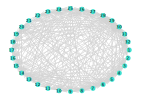

In [34]:
nodelabel = 1:nv(instance_test["kep32"])
gplot(instance_test["kep32"], layout=circular_layout, nodelabel=nodelabel)

In [90]:
length_max_cycle = 3
distribution1 = "BinomialAPD"
fail = get_failure_rates(instance_test["kep32"],distribution1)
CPUtic()
cycles, lc, Ac, A, I, Ca = pre_traitement(instance_test["kep32"],length_max_cycle)
tps_pretraitement = CPUtoc()
description_instance(instance_test["kep32"], length_max_cycle, A, cycles, "kep32")
println("Temps CPU de prétraitement : ", tps_pretraitement)

elapsed CPU time: 0.015 seconds
# Description de l'instance kep32
Nombre de sommet : 32

Nombre de cycles de longueur inférieure à 3 : 51

Nombre d'arcs appartenant à au moins un cycle : 77
Nombre de sommets appartenant à au moins un cycle : 26
Proportion de patients UNOS très sensible dans l'instance : 15.625% 

Proportion de patients APD très sensible dans l'instance : : 15.625% 

Nombre de patients UNOS très sensible dans l'instance : 13
Nombre de patients UNOS très sensible dans l'instance : 13
Temps CPU de prétraitement : 0.015


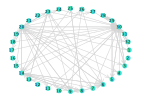

In [10]:
plot_cycle_edges(instance_test["kep32"], cycles)

### Résolution en prenant les probabilités comme données déterministes

Modèle déterministe par cycle qui prend en compte la taille des cycles

In [109]:
function test_distribMIP(instance, distrib, take_length)
    
    fail = get_failure_rates(instance,distrib)
    CPUtic()
    sol,save = determinist_weighted_cycle_MIP(instance, cycles, take_length)       
    time = CPUtoc()
    println( string("Temps CPU  : ", time))
    println( string("Nombre de transplantations possibles trouvées : ", sum(length(sol[c]) for c in 1:length(sol)), "\n"))
    println(string("Nombre moyen de test réussis après choix des cycles (pondération du nombre d'arcs par les probas de réussite) : ", save))
    nb_unos,nb_apd = get_pra_in_sol(instance,sol)
    println(string("Nombre de UNOS sensibles dans la solution (pra>0.8) : ", nb_unos,"\n"))
    println(string("Nombre de APD sensibles dans la solution (pra>0.75) :  ", nb_apd,"\n"))
    
    return time, sol
end

test_distribMIP (generic function with 1 method)

elapsed CPU time: 0.016 seconds
Temps CPU  : 0.016
Nombre de transplantations possibles trouvées : 13

Nombre moyen de test réussis après choix des cycles (pondération du nombre d'arcs par les probas de réussite) : 4.495860941443606
Nombre de UNOS sensibles dans la solution (pra>0.8) : 3

Nombre de APD sensibles dans la solution (pra>0.75) :  3


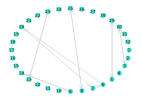

In [63]:
_,sol_bin = test_distribMIP(instance_test["kep32"], "Binomial", true)
plot_cycle_edges(instance_test["kep32"], sol_bin)

elapsed CPU time: 0.0 seconds
Temps CPU  : 0.0
Nombre de transplantations possibles trouvées : 10

Nombre moyen de test réussis après choix des cycles (pondération du nombre d'arcs par les probas de réussite) : 2.568481424695749
Nombre de UNOS sensibles dans la solution (pra>0.8) : 1

Nombre de APD sensibles dans la solution (pra>0.75) :  1



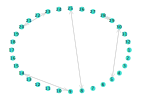

In [64]:
_,sol_bin = test_distribMIP(instance_test["kep32"], "Binomial", true)
plot_cycle_edges(instance_test["kep32"], sol_bin)

elapsed CPU time: 0.0 seconds
Temps CPU  : 0.0
Nombre de transplantations possibles trouvées : 9

Nombre moyen de test réussis après choix des cycles (pondération du nombre d'arcs par les probas de réussite) : 1.2087278697235562
Nombre de UNOS sensibles dans la solution (pra>0.8) : 1

Nombre de APD sensibles dans la solution (pra>0.75) :  1



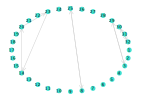

In [65]:
_,sol_bin = test_distribMIP(instance_test["kep32"], "Binomial", true)
plot_cycle_edges(instance_test["kep32"], sol_bin)

Les solutions obtenues avec la distribution binomiale ne sont pas stable. En effet, les proba de succès sont changeantes.  

elapsed CPU time: 0.016 seconds
Temps CPU  : 0.016
Nombre de transplantations possibles trouvées : 12

Nombre moyen de test réussis après choix des cycles (pondération du nombre d'arcs par les probas de réussite) : 7.7940000000000005
Nombre de UNOS sensibles dans la solution (pra>0.8) : 1

Nombre de APD sensibles dans la solution (pra>0.75) :  1


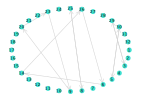

In [61]:
_,sol_unos1 = test_distribMIP(instance_test["kep32"], "BinomialUNOS", true)
plot_cycle_edges(instance_test["kep32"], sol_unos1)

elapsed CPU time: 0.0 seconds
Temps CPU  : 0.0
Nombre de transplantations possibles trouvées : 12

Nombre moyen de test réussis après choix des cycles (pondération du nombre d'arcs par les probas de réussite) : 7.7940000000000005
Nombre de UNOS sensibles dans la solution (pra>0.8) : 1

Nombre de APD sensibles dans la solution (pra>0.75) :  1


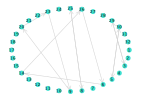

In [66]:
_,sol_unos1 = test_distribMIP(instance_test["kep32"], "BinomialUNOS", true)
plot_cycle_edges(instance_test["kep32"], sol_unos1)

elapsed CPU time: 0.016 seconds
Temps CPU  : 0.016
Nombre de transplantations possibles trouvées : 12

Nombre moyen de test réussis après choix des cycles (pondération du nombre d'arcs par les probas de réussite) : 7.7940000000000005
Nombre de UNOS sensibles dans la solution (pra>0.8) : 1

Nombre de APD sensibles dans la solution (pra>0.75) :  1


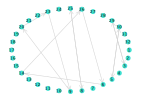

In [67]:
_,sol_unos1 = test_distribMIP(instance_test["kep32"], "BinomialUNOS", true)
plot_cycle_edges(instance_test["kep32"], sol_unos1)

elapsed CPU time: 0.0 seconds
Temps CPU  : 0.0
Nombre de transplantations possibles trouvées : 13

Nombre moyen de transplantations réussis (pondération des transplantations par leur proba de réussite) : 5.439744
Nombre de UNOS sensibles dans la solution (pra>0.8) : 2

Nombre de APD sensibles dans la solution (pra>0.75) :  2



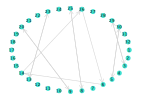

In [39]:
_,sol_apd1 = test_distribMIP(instance_test["kep32"], "BinomialAPD", true)
plot_cycle_edges(instance_test["kep32"], sol_apd1)

elapsed CPU time: 0.016 seconds
Temps CPU  : 0.016
Nombre de transplantations possibles trouvées : 13

Nombre moyen de test réussis après choix des cycles (pondération du nombre d'arcs par les probas de réussite) : 5.439744
Nombre de UNOS sensibles dans la solution (pra>0.8) : 2

Nombre de APD sensibles dans la solution (pra>0.75) :  2



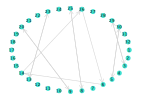

In [68]:
_,sol_apd1 = test_distribMIP(instance_test["kep32"], "BinomialAPD", true)
plot_cycle_edges(instance_test["kep32"], sol_apd1)

Avec cette modélisation, la distribution joue un rôle dans le choix des cycles. On remarque que l'on a obtenu qu'un seul cycle de 3 avec la binomiale APD alors que l'on en a 2 avec la distribution BinomialeUNOS 

Ainsi, l'expertise métier - qui étudie la distribution - a ici une certaine influence sur la solution obtenue.

On réalise maintenant le modèle déterministe qui ne prend pas en compte la longueur des cycles : 

elapsed CPU time: 0.016 seconds
Temps CPU  : 0.016
Nombre de transplantations possibles trouvées : 12

Nombre moyen de test réussis après choix des cycles (pondération du nombre d'arcs par les probas de réussite) : 5.125464553861171
Nombre de UNOS sensibles dans la solution (pra>0.8) : 2

Nombre de APD sensibles dans la solution (pra>0.75) :  2



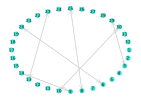

In [69]:
_,sol_bin2 = test_distribMIP(instance_test["kep32"], "Binomial", false)
plot_cycle_edges(instance_test["kep32"], sol_bin2)

elapsed CPU time: 0.015 seconds
Temps CPU  : 0.015
Nombre de transplantations possibles trouvées : 11

Nombre moyen de test réussis après choix des cycles (pondération du nombre d'arcs par les probas de réussite) : 4.383013638805224
Nombre de UNOS sensibles dans la solution (pra>0.8) : 1

Nombre de APD sensibles dans la solution (pra>0.75) :  1



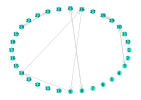

In [72]:
_,sol_bin2 = test_distribMIP(instance_test["kep32"], "Binomial", false)
plot_cycle_edges(instance_test["kep32"], sol_bin2)

elapsed CPU time: 0.0 seconds
Temps CPU  : 0.0
Nombre de transplantations possibles trouvées : 12

Nombre moyen de transplantations réussis (pondération des transplantations par leur proba de réussite) : 6.84
Nombre de UNOS sensibles dans la solution (pra>0.8) : 2

Nombre de APD sensibles dans la solution (pra>0.75) :  2



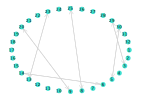

In [56]:
_,sol_unos2 = test_distribMIP(instance_test["kep32"], "BinomialUNOS", false)
plot_cycle_edges(instance_test["kep32"], sol_unos2)

elapsed CPU time: 0.016 seconds
Temps CPU  : 0.016
Nombre de transplantations possibles trouvées : 12

Nombre moyen de transplantations réussis (pondération des transplantations par leur proba de réussite) : 5.3568
Nombre de UNOS sensibles dans la solution (pra>0.8) : 2

Nombre de APD sensibles dans la solution (pra>0.75) :  2



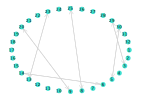

In [57]:
_,sol_apd2 = test_distribMIP(instance_test["kep32"], "BinomialAPD", false)
plot_cycle_edges(instance_test["kep32"], sol_apd2)

On remarque que si on ne prend pas en compte la taille du cycle dans la modélisation, on obtient la même solution quelle que soit la distribution (pour BinomialeAPD ou BinomialeUNOS). La distribution a donc ici moind d'impact.

Les solutions obtenues ne comportent aucun cycle de plus de 3 arcs.

On teste maintenant le modèle avec recours. On se donne la possibilité d'effectuer 13 tests. On prendra en compte 200 scénarios et on testera les solveurs GLPK et Highs

### Résolution avec Lshaped
#### Pour la distribution BinomialeUNOS
Avec GLPK : 

In [105]:
nb_tests_allowed = 13
L = 3
nb_sce = 150
itmax = 30
fail = get_failure_rates(instance_test["kep32"],"BinomialeUNOS")
CPUtic()
sol,eta,_,obj = Lshaped_relax(instance_test["kep32"], L, nb_tests_allowed, nb_sce, cycles, lc, Ac, A, I, Ca, false, itmax, "GLPK", 0.01)       
time = CPUtoc()
println(string("Temps CPU  : ",time))
println(string("Nombre de personne sauvées en moyenne ", mean(obj) ))
VSS, ev = vss(instance_test["kep32"], L, nb_tests_allowed, mean(obj), cycles, lc, Ac, A, I, Ca)
println("La modélisation stochastique nous permet de sauver en moyenne ", VSS," personnes en plus par rapport au problème au valeur moyenne")
EVPI, WS = evpi(instance_test["kep32"], L, nb_tests_allowed, nb_sce, mean(obj), cycles, lc, Ac, A, I, Ca)
println("Nous aurions pu sauver en moyenne ", EVPI, " personnes en plus si nous avions pris les décisions en après la réalisation des incertitudes")

elapsed CPU time: 115.563 seconds
Temps CPU  : 115.563
Nombre de personne sauvées en moyenne 1.52
La modélisation stochastique nous permet de sauver en moyenne 1.52 personnes en plus par rapport au problème au valeur moyenne
Nous aurions pu sauver en moyenne 8.420000000000002 personnes en plus si nous avions pris les décisions en après la réalisation des incertitudes


On trace le graphique des tests réalisés : 

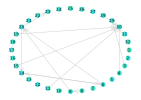

In [95]:
plot_choix_test(instance_test["kep32"],sol)

In [106]:
itmax = 30
CPUtic()
sol2,_,_,obj = Lshaped_relax(instance_test["kep32"], L, nb_tests_allowed, nb_sce, cycles, lc, Ac, A, I, Ca, false, itmax, "HiGHS", 0.01)       
time = CPUtoc()
println(string("Temps CPU  : ",time))
println(string("Nombre de personne sauvées en moyenne ", mean(obj) ))
VSS, ev = vss(instance_test["kep32"], L, nb_tests_allowed, mean(obj), cycles, lc, Ac, A, I, Ca)
println("La modélisation stochastique nous permet de sauver en moyenne ", VSS," personnes en plus par rapport au problème au valeur moyenne")
EVPI, WS = evpi(instance_test["kep32"], L, nb_tests_allowed, nb_sce, mean(obj), cycles, lc, Ac, A, I, Ca)
println("Nous aurions pu sauver en moyenne ", EVPI, " personnes en plus si nous avions pris les décisions après la réalisation des incertitudes")

elapsed CPU time: 220.687 seconds
Temps CPU  : 220.687
Nombre de personne sauvées en moyenne 1.0133333333333334
La modélisation stochastique nous permet de sauver en moyenne 1.0133333333333334 personnes en plus par rapport au problème au valeur moyenne
Nous aurions pu sauver en moyenne 8.793333333333333 personnes en plus si nous avions pris les décisions après la réalisation des incertitudes


#### Avec la distribution BinomialeAPD

Avec GLPK

In [107]:
fail = get_failure_rates(instance_test["kep32"],"BinomialeAPD")
CPUtic()
sol,eta,_,obj = Lshaped_relax(instance_test["kep32"], L, nb_tests_allowed, nb_sce, cycles, lc, Ac, A, I, Ca, false, itmax, "GLPK", 0.01)       
time = CPUtoc()
println(string("Temps CPU  : ",time))
println(string("Nombre de personne sauvées en moyenne ", mean(obj) ))
VSS, ev = vss(instance_test["kep32"], L, nb_tests_allowed, mean(obj), cycles, lc, Ac, A, I, Ca)
println("La modélisation stochastique nous permet de sauver en moyenne ", VSS," personnes en plus par rapport au problème au valeur moyenne")
EVPI, WS = evpi(instance_test["kep32"], L, nb_tests_allowed, nb_sce, mean(obj), cycles, lc, Ac, A, I, Ca)
println("Nous aurions pu sauver en moyenne ", EVPI, " personnes en plus si nous avions pris les décisions après la réalisation des incertitudes")

elapsed CPU time: 150.938 seconds
Temps CPU  : 150.938
Nombre de personne sauvées en moyenne 1.0666666666666667
La modélisation stochastique nous permet de sauver en moyenne 1.0666666666666667 personnes en plus par rapport au problème au valeur moyenne
Nous aurions pu sauver en moyenne 8.92 personnes en plus si nous avions pris les décisions après la réalisation des incertitudes


In [108]:
itmax = 30
CPUtic()
sol2,_,_,obj = Lshaped_relax(instance_test["kep32"], L, nb_tests_allowed, nb_sce, cycles, lc, Ac, A, I, Ca, false, itmax, "HiGHS", 0.01)       
time = CPUtoc()
println(string("Temps CPU  : ",time))
println(string("Nombre de personne sauvées en moyenne ", mean(obj) ))
VSS, ev = vss(instance_test["kep32"], L, nb_tests_allowed, mean(obj), cycles, lc, Ac, A, I, Ca)
println("La modélisation stochastique nous permet de sauver en moyenne ", VSS," personnes en plus par rapport au problème au valeur moyenne")
EVPI, WS = evpi(instance_test["kep32"], L, nb_tests_allowed, nb_sce, mean(obj), cycles, lc, Ac, A, I, Ca)
println("Nous aurions pu sauver en moyenne ", EVPI, " personnes en plus si nous avions pris les décisions en même temps que la réalisations des incertitudes")

elapsed CPU time: 175.375 seconds
Temps CPU  : 175.375
Nombre de personne sauvées en moyenne 1.48
La modélisation stochastique nous permet de sauver en moyenne 1.48 personnes en plus par rapport au problème au valeur moyenne
Nous aurions pu sauver en moyenne 8.446666666666665 personnes en plus si nous avions pris les décisions en même temps que la réalisations des incertitudes


## Test de l'instance à 64 sommets : 
Pour cette instance, on ne regardera que les cycles d'une taille inférieure à 2

In [112]:
L = 2
distribution1 = "BinomialUNOS"
fail = get_failure_rates(instance_test["kep64"],distribution1)
CPUtic()
cycles, lc, Ac, A, I, Ca = pre_traitement(instance_test["kep64"],L)
tps_pretraitement = CPUtoc()
description_instance(instance_test["kep64"], L, A, cycles, "kep64")
println("Temps CPU de prétraitement : ", tps_pretraitement)

elapsed CPU time: 0.0 seconds
# Description de l'instance kep64
Nombre de sommet : 64

Nombre de cycles de longueur inférieure à 2 : 87

Nombre d'arcs appartenant à au moins un cycle : 174
Nombre de sommets appartenant à au moins un cycle : 49
Proportion de patients UNOS très sensible dans l'instance : 20.3125% 

Proportion de patients APD très sensible dans l'instance : : 20.3125% 

Nombre de patients UNOS très sensible dans l'instance : 28
Nombre de patients UNOS très sensible dans l'instance : 28
Temps CPU de prétraitement : 0.0


### BinomialeUNOS
#### Modèle déterministe

elapsed CPU time: 0.016 seconds
Temps CPU  : 0.016
Nombre de transplantations possibles trouvées : 24

Nombre moyen de test réussis après choix des cycles (pondération du nombre d'arcs par les probas de réussite) : 15.120000000000005
Nombre de UNOS sensibles dans la solution (pra>0.8) : 3

Nombre de APD sensibles dans la solution (pra>0.75) :  3



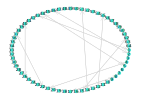

In [113]:
_,sol_unos = test_distribMIP(instance_test["kep64"], "BinomialUNOS", false)
plot_cycle_edges(instance_test["kep64"], sol_unos)

#### Lshaped
Rq : La distribution de probabilité est mis à jour lors de l'exécution de la fonction `test_distribMIP`

In [114]:
itmax = 20
nb_sce = 100
CPUtic()
sol,eta,_,obj = Lshaped_relax(instance_test["kep64"], L, nb_tests_allowed, nb_sce, cycles, lc, Ac, A, I, Ca, false, itmax, "GLPK", 0.01)       
time = CPUtoc()
println(string("Temps CPU  : ",time))
println(string("Nombre de personne sauvées en moyenne ", mean(obj) ))
VSS, ev = vss(instance_test["kep64"], L, nb_tests_allowed, mean(obj), cycles, lc, Ac, A, I, Ca)
println("La modélisation stochastique nous permet de sauver en moyenne ", VSS," personnes en plus par rapport au problème au valeur moyenne")
EVPI, WS = evpi(instance_test["kep64"], L, nb_tests_allowed, nb_sce, mean(obj), cycles, lc, Ac, A, I, Ca)
println("Nous aurions pu sauver en moyenne ", EVPI, " personnes en plus si nous avions pris les décisions en après la réalisation des incertitudes")

### BinomialeAPD
#### Modèle déterministe

In [ ]:
_,sol_apd = test_distribMIP(instance_test["kep64"], "BinomialAPD", false)

#### Lshaped

In [ ]:
itmax = 30
CPUtic()
sol,eta,_,obj = Lshaped_relax(instance_test["kep64"], L, nb_tests_allowed, nb_sce, cycles, lc, Ac, A, I, Ca, false, itmax, "GLPK", 0.01)       
time = CPUtoc()
println(string("Temps CPU  : ",time))
println(string("Nombre de personne sauvées en moyenne ", mean(obj) ))
VSS, ev = vss(instance_test["kep64"], L, nb_tests_allowed, mean(obj), cycles, lc, Ac, A, I, Ca)
println("La modélisation stochastique nous permet de sauver en moyenne ", VSS," personnes en plus par rapport au problème au valeur moyenne")
EVPI, WS = evpi(instance_test["kep64"], L, nb_tests_allowed, nb_sce, mean(obj), cycles, lc, Ac, A, I, Ca)
println("Nous aurions pu sauver en moyenne ", EVPI, " personnes en plus si nous avions pris les décisions en après la réalisation des incertitudes")

## Test de l'instance de 128 sommets
### Description de l'instance
Afin de ne pas prendre trop de temps, on effectue l'optimisation uniquement sur binomialUNOS

In [25]:
length_max_cycle = 2
distribution1 = "BinomialUNOS"
fail = get_failure_rates(instance_test["kep128"],distribution1)
CPUtic()
cycles, lc, Ac, A, I, Ca = pre_traitement(instance_test["kep128"],L)
tps_pretraitement = CPUtoc()
description_instance(instance_test["kep128"], length_max_cycle, A, cycles, "kep128")
println("Temps CPU de prétraitement : ", tps_pretraitement)

elapsed CPU time: 190.141 seconds
# Description de l'instance kep128
Nombre de sommet : 128

Nombre de cycles de longueur inférieure à 2 : 166905

Proportion of UNOS high sensitized patients in instance : 21.875% 

Proportion of APD high sensitized patients in instance : 21.875% 

Number of UNOS high sensitized patients in cycles of instance : 1320
Number of APD high sensitized patients in cycles of instance : 1320
Temps CPU de prétraitement : 190.141


### BinomialeUNOS
#### Modèle déterministe

In [ ]:
_,sol_unos = test_distribMIP(instance_test["kep64"], "BinomialUNOS", false)

#### Lshaped

In [ ]:
itmax = 20
nb_sce = 100
CPUtic()
sol,eta,_,obj = Lshaped_relax(instance_test["kep64"], L, nb_tests_allowed, nb_sce, cycles, lc, Ac, A, I, Ca, false, itmax, "GLPK", 0.01)       
time = CPUtoc()
println(string("Temps CPU  : ",time))
println(string("Nombre de personne sauvées en moyenne ", mean(obj) ))
VSS, ev = vss(instance_test["kep64"], L, nb_tests_allowed, mean(obj), cycles, lc, Ac, A, I, Ca)
println("La modélisation stochastique nous permet de sauver en moyenne ", VSS," personnes en plus par rapport au problème au valeur moyenne")
EVPI, WS = evpi(instance_test["kep64"], L, nb_tests_allowed, nb_sce, mean(obj), cycles, lc, Ac, A, I, Ca)
println("Nous aurions pu sauver en moyenne ", EVPI, " personnes en plus si nous avions pris les décisions en après la réalisation des incertitudes")